# Code Tryout

In [1]:
import sys
import os
import re
from ftplib import FTP_TLS, FTP
from tqdm import tqdm
import requests
from bs4 import BeautifulSoup

In [2]:
from AutoBERN.utils import login_sopac, login_aiub, login_cddis, NOOPCHECK, dir_exists, download
from AutoBERN.station_files import crd, vel, sat, fix, psd
from AutoBERN.igs_rinex import sopac_rinex, sopac_bulk_rinex, cddis_daily_obs, cddis_gps_nav, cddis_hatanaka_obs
from AutoBERN.daily_files import clk, bulk_daily_files, eph, erp, ion

In [3]:
download_folder = "/media/abhishek/DATA/open_source/bernese_automation/test_downloads"

# AIUB
Required files
- CLK, ERP, EPH, ION, P1C1XXXX.DCB, P1P2XXXX.DCB
- Daily files - CLK, ERP, EPH and ION
- Monthly files - P1C1 and P1P22
- CRD, VEL, FIX, PSD from ../BSWUSER52/STA
- SAT_xxxx.CRX from ../BSWUSER52/GEN

In [14]:
aiub = login_aiub()

220 130.92.252.184 FTP server ready


In [15]:
NOOPCHECK(aiub)

200 NOOP command successful


True

In [16]:
download_folder = "/media/abhishek/DATA/open_source/bernese_automation/test_downloads"


In [6]:
crd(aiub, download_folder)

['IGB08_R.CRD', 'IGB14.CRD', 'IGB14_R.CRD', 'IGS05_R.CRD', 'IGS08_R.CRD', 'IGS14.CRD', 'IGS14_R.CRD', 'IGS_00B_R.CRD', 'IGS_00_R.CRD', 'IGT05_R.CRD', 'ITRF2000_R.CRD', 'ITRF2005_R.CRD', 'ITRF2008_R.CRD', 'ITRF2014_R.CRD', 'ITRF91.CRD', 'ITRF92.CRD', 'ITRF93.CRD', 'ITRF94.CRD', 'ITRF96.CRD', 'ITRF97.CRD', 'IGS20_R.CRD']
IGB14.CRD
The directory - /media/abhishek/DATA/open_source/bernese_automation/test_downloads exists
FTP Dir: /BSWUSER52/STA, Local Dir: /media/abhishek/DATA/open_source/bernese_automation


In [13]:
sat(aiub, download_folder)

['SAT_2021.CRX', 'SAT_2020.CRX', 'SAT_2022.CRX', 'SAT_2023.CRX', 'SAT_1994.CRX', 'SAT_1995.CRX', 'SAT_1996.CRX', 'SAT_1997.CRX', 'SAT_1998.CRX', 'SAT_1999.CRX', 'SAT_2000.CRX', 'SAT_2001.CRX', 'SAT_2002.CRX', 'SAT_2003.CRX', 'SAT_2004.CRX', 'SAT_2005.CRX', 'SAT_2006.CRX', 'SAT_2007.CRX', 'SAT_2008.CRX', 'SAT_2009.CRX', 'SAT_2010.CRX', 'SAT_2011.CRX', 'SAT_2012.CRX', 'SAT_2013.CRX', 'SAT_2014.CRX', 'SAT_2015.CRX', 'SAT_2016.CRX', 'SAT_2017.CRX', 'SAT_2019.CRX', 'SAT_2018.CRX', 'SAT_1992.CRX', 'SAT_1993.CRX', 'SAT_2024.CRX']
The directory - /media/abhishek/DATA/open_source/bernese_automation/test_downloads exists
FTP Dir: /BSWUSER52/GEN, Local Dir: /media/abhishek/DATA/open_source/bernese_automation
Error occured, 550 1: No such file or directory


In [14]:
fix(aiub, download_folder)

['IGB08.FIX', 'IGB14.FIX', 'IGS05.FIX', 'IGS08.FIX', 'IGS14.FIX', 'IGS_00.FIX', 'IGS_00B.FIX', 'IGT05.FIX', 'ITRF2000.FIX', 'ITRF2005.FIX', 'ITRF2008.FIX', 'ITRF2014.FIX', 'IGS20.FIX']
The directory - /media/abhishek/DATA/open_source/bernese_automation/test_downloads exists
FTP Dir: /BSWUSER52/STA, Local Dir: /media/abhishek/DATA/open_source/bernese_automation
Error occured, 550 5: No such file or directory


In [15]:
vel(aiub, download_folder)

['IGB08_R.VEL', 'IGB14.VEL', 'IGB14_R.VEL', 'IGS05_R.VEL', 'IGS08_R.VEL', 'IGS14_R.VEL', 'IGS_00B_R.VEL', 'IGS_00_R.VEL', 'IGT05_R.VEL', 'ITRF2000_R.VEL', 'ITRF2005_R.VEL', 'ITRF2008_R.VEL', 'ITRF2014_R.VEL', 'ITRF91.VEL', 'ITRF92.VEL', 'ITRF93.VEL', 'ITRF94.VEL', 'ITRF96.VEL', 'ITRF97.VEL', 'IGS20_R.VEL']
IGB08_R.VEL
The directory - /media/abhishek/DATA/open_source/bernese_automation/test_downloads exists
FTP Dir: /BSWUSER52/STA, Local Dir: /media/abhishek/DATA/open_source/bernese_automation


In [16]:
psd(aiub, download_folder)

['IGB14.PSD', 'IGS14.PSD', 'ITRF2014gnss.PSD', 'IGS20.PSD']
IGS14.PSD
The directory - /media/abhishek/DATA/open_source/bernese_automation/test_downloads exists
FTP Dir: /BSWUSER52/STA, Local Dir: /media/abhishek/DATA/open_source/bernese_automation


In [22]:
aiub.cwd('/CODE/2022')
aiub.nlst()

['COD22002.SNX.Z',
 'COD22002_v3.CLK.Z',
 'CGIM0010.22N.Z',
 'CGIM0020.22N.Z',
 'CGIM0030.22N.Z',
 'CGIM0040.22N.Z',
 'CGIM0050.22N.Z',
 'CGIM0060.22N.Z',
 'CGIM0070.22N.Z',
 'CGIM0080.22N.Z',
 'CGIM0090.22N.Z',
 'CGIM0100.22N.Z',
 'CGIM0110.22N.Z',
 'CGIM0120.22N.Z',
 'CGIM0130.22N.Z',
 'CGIM0140.22N.Z',
 'CGIM0150.22N.Z',
 'CGIM0160.22N.Z',
 'CGIM0170.22N.Z',
 'CGIM0180.22N.Z',
 'CGIM0190.22N.Z',
 'CGIM0200.22N.Z',
 'CGIM0210.22N.Z',
 'CGIM0220.22N.Z',
 'CGIM0230.22N.Z',
 'CGIM0240.22N.Z',
 'CGIM0250.22N.Z',
 'CGIM0260.22N.Z',
 'CGIM0270.22N.Z',
 'CGIM0280.22N.Z',
 'CGIM0290.22N.Z',
 'CGIM0300.22N.Z',
 'CGIM0310.22N.Z',
 'CGIM0320.22N.Z',
 'CGIM0330.22N.Z',
 'CGIM0340.22N.Z',
 'CGIM0350.22N.Z',
 'CGIM0360.22N.Z',
 'CGIM0370.22N.Z',
 'CGIM0380.22N.Z',
 'CGIM0390.22N.Z',
 'CGIM0400.22N.Z',
 'CGIM0410.22N.Z',
 'CGIM0420.22N.Z',
 'CGIM0430.22N.Z',
 'CGIM0440.22N.Z',
 'CGIM0450.22N.Z',
 'CGIM0460.22N.Z',
 'CGIM0470.22N.Z',
 'CGIM0480.22N.Z',
 'CGIM0490.22N.Z',
 'CGIM0500.22N.Z',
 'CGIM051

In [8]:
clk(download_folder, aiub, 'iisc', 2022, 4)

FTP Dir: /CODE/2022, Local Dir: /media/abhishek/DATA/open_source/bernese_automation


In [9]:
eph(download_folder, aiub, 'iisc', 2022, 105)

FTP Dir: /CODE/2022, Local Dir: /media/abhishek/DATA/open_source/bernese_automation


In [10]:
erp(download_folder, aiub, 'iisc', 2022, 222)

FTP Dir: /CODE/2022, Local Dir: /media/abhishek/DATA/open_source/bernese_automation


In [11]:
ion(download_folder, aiub, 'iisc', 2022, 310)

FTP Dir: /CODE/2022, Local Dir: /media/abhishek/DATA/open_source/bernese_automation


#### RINEX Files
- ftp://garner.ucsd.edu/pub/rinex
- https://cddis.nasa.gov/archive/gnss/

# SOPAC RINEX Files

In [3]:
sopac = login_sopac()

220 Welcome to SOPAC FTP service. Please use anonymous as the login name and a real email address as the password.


In [4]:
test_downloads = '/media/abhishek/DATA/open_source/bernese_automation/test_downloads'

In [12]:
help(sopac_rinex)

Help on function sopac_rinex in module AutoBERN.igs_rinex:

sopac_rinex(download_dir, session, station, year, doy)
    _summary_
    
    Args:
        download_dir (_type_): _description_
        session (_type_): _description_
        station (_type_): _description_
        year (_type_): _description_
        doy (_type_): _description_
    
    Raises:
        ValueError: _description_



In [6]:
sopac_rinex(download_dir=test_downloads, session=sopac, station='iisc', year=2022, doy=111)

FTP Dir: /archive/garner/rinex/2022/111, Local Dir: /media/abhishek/DATA/open_source/bernese_automation


In [5]:
sopac_bulk_rinex(test_downloads, 'iisc', 2022, 85, 2022, 95)

220 Welcome to SOPAC FTP service. Please use anonymous as the login name and a real email address as the password.


  0%|          | 0/11 [00:00<?, ?it/s]

FTP Dir: /archive/garner/rinex/2022/085, Local Dir: /media/abhishek/DATA/open_source/bernese_automation


  9%|▉         | 1/11 [00:06<01:05,  6.59s/it]

FTP Dir: /archive/garner/rinex/2022/086, Local Dir: /media/abhishek/DATA/open_source/bernese_automation


 18%|█▊        | 2/11 [00:12<00:55,  6.15s/it]

FTP Dir: /archive/garner/rinex/2022/087, Local Dir: /media/abhishek/DATA/open_source/bernese_automation


 27%|██▋       | 3/11 [00:18<00:49,  6.14s/it]

FTP Dir: /archive/garner/rinex/2022/088, Local Dir: /media/abhishek/DATA/open_source/bernese_automation


 36%|███▋      | 4/11 [00:25<00:46,  6.59s/it]

FTP Dir: /archive/garner/rinex/2022/089, Local Dir: /media/abhishek/DATA/open_source/bernese_automation


 45%|████▌     | 5/11 [00:31<00:38,  6.42s/it]

FTP Dir: /archive/garner/rinex/2022/090, Local Dir: /media/abhishek/DATA/open_source/bernese_automation


 55%|█████▍    | 6/11 [00:39<00:33,  6.78s/it]

FTP Dir: /archive/garner/rinex/2022/091, Local Dir: /media/abhishek/DATA/open_source/bernese_automation


 64%|██████▎   | 7/11 [00:45<00:26,  6.56s/it]

FTP Dir: /archive/garner/rinex/2022/092, Local Dir: /media/abhishek/DATA/open_source/bernese_automation


 73%|███████▎  | 8/11 [00:52<00:20,  6.71s/it]

FTP Dir: /archive/garner/rinex/2022/093, Local Dir: /media/abhishek/DATA/open_source/bernese_automation


 82%|████████▏ | 9/11 [00:58<00:13,  6.61s/it]

FTP Dir: /archive/garner/rinex/2022/094, Local Dir: /media/abhishek/DATA/open_source/bernese_automation


 91%|█████████ | 10/11 [01:05<00:06,  6.64s/it]

FTP Dir: /archive/garner/rinex/2022/095, Local Dir: /media/abhishek/DATA/open_source/bernese_automation


100%|██████████| 1/1 [00:00<00:00, 3271.69it/s]


In [13]:
help(sopac_bulk_rinex)

Help on function sopac_bulk_download in module AutoBERN.igs_rinex:

sopac_bulk_download(download_dir, station, start_year, start_doy, end_year, end_doy)
    _summary_
    
    Args:
        download_dir (_type_): _description_
        station (_type_): _description_
        start_year (_type_): _description_
        start_doy (_type_): _description_
        end_year (_type_): _description_
        end_doy (_type_): _description_
    
    Raises:
        ValueError: _description_



In [5]:
sopac_bulk_rinex(test_downloads, 'iitk', 2022, 365, 2023, 7)

220 Welcome to SOPAC FTP service. Please use anonymous as the login name and a real email address as the password.


  0%|          | 0/2 [00:00<?, ?it/s]

FTP Dir: /archive/garner/rinex/2022/365, Local Dir: /media/abhishek/DATA/open_source/bernese_automation


 50%|█████     | 1/2 [00:08<00:08,  8.55s/it]

File Not Found - iitk data for 2022 and day 366 - skipping!


FTP Dir: /archive/garner/rinex/2022/001, Local Dir: /media/abhishek/DATA/open_source/bernese_automation


FTP Dir: /archive/garner/rinex/2022/002, Local Dir: /media/abhishek/DATA/open_source/bernese_automation


FTP Dir: /archive/garner/rinex/2022/003, Local Dir: /media/abhishek/DATA/open_source/bernese_automation


FTP Dir: /archive/garner/rinex/2022/004, Local Dir: /media/abhishek/DATA/open_source/bernese_automation


FTP Dir: /archive/garner/rinex/2022/005, Local Dir: /media/abhishek/DATA/open_source/bernese_automation


FTP Dir: /archive/garner/rinex/2022/006, Local Dir: /media/abhishek/DATA/open_source/bernese_automation


FTP Dir: /archive/garner/rinex/2022/007, Local Dir: /media/abhishek/DATA/open_source/bernese_automation


100%|██████████| 2/2 [00:53<00:00, 26.67s/it]


# CDDIS Rinex

In [4]:
cddis = login_cddis()

220-**********************************************************************
220-                 CDDIS Anonymous FTP Archive
220-
220-By accessing and using this information system, you acknowledge and consent to the following:
220-
220-You are accessing a U.S. Government information system, which includes:
220-(1) this computer; (2) this computer network; (3) all computers connected to this network
220-including end user systems; (4) all devices and storage media attached to this network or
220-to any computer on this network; and (5) cloud and remote information services. This
220-information system is provided for U.S. Government-authorized use only. You have no
220-reasonable expectation of privacy regarding any communication transmitted through or data
220-stored on this information system.  At any time, and for any lawful purpose, the U.S.
220-Government may monitor, intercept, search, and seize any communication or data transiting,
220-stored on, or traveling to or from this info

#### CDDIS RINEX Version 3 nomenclature
Ref: https://cddis.nasa.gov/Data_and_Derived_Products/GNSS/RINEX_Version_3.html

Starting dir - https://cddis.nasa.gov/archive/gnss/data/

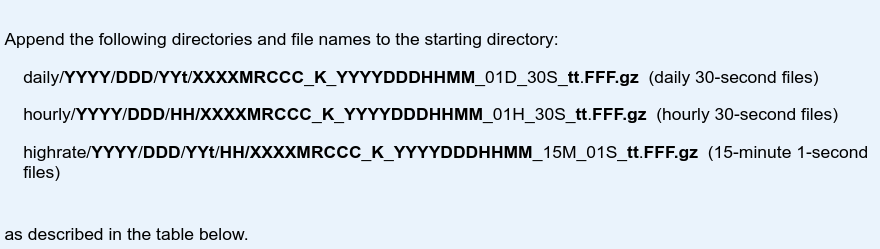

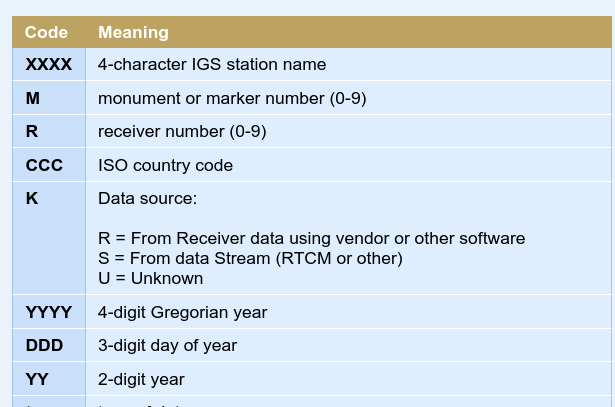

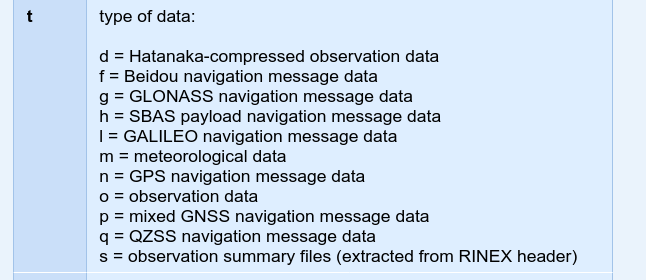
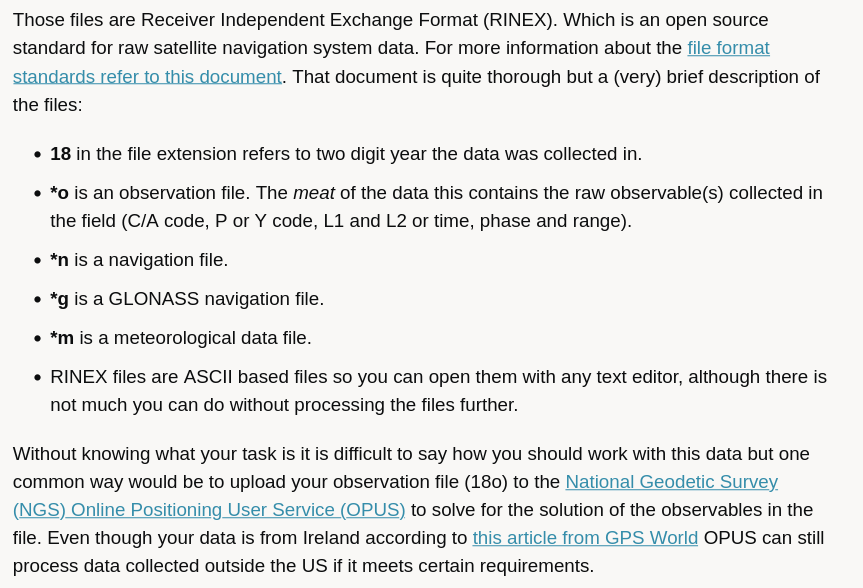
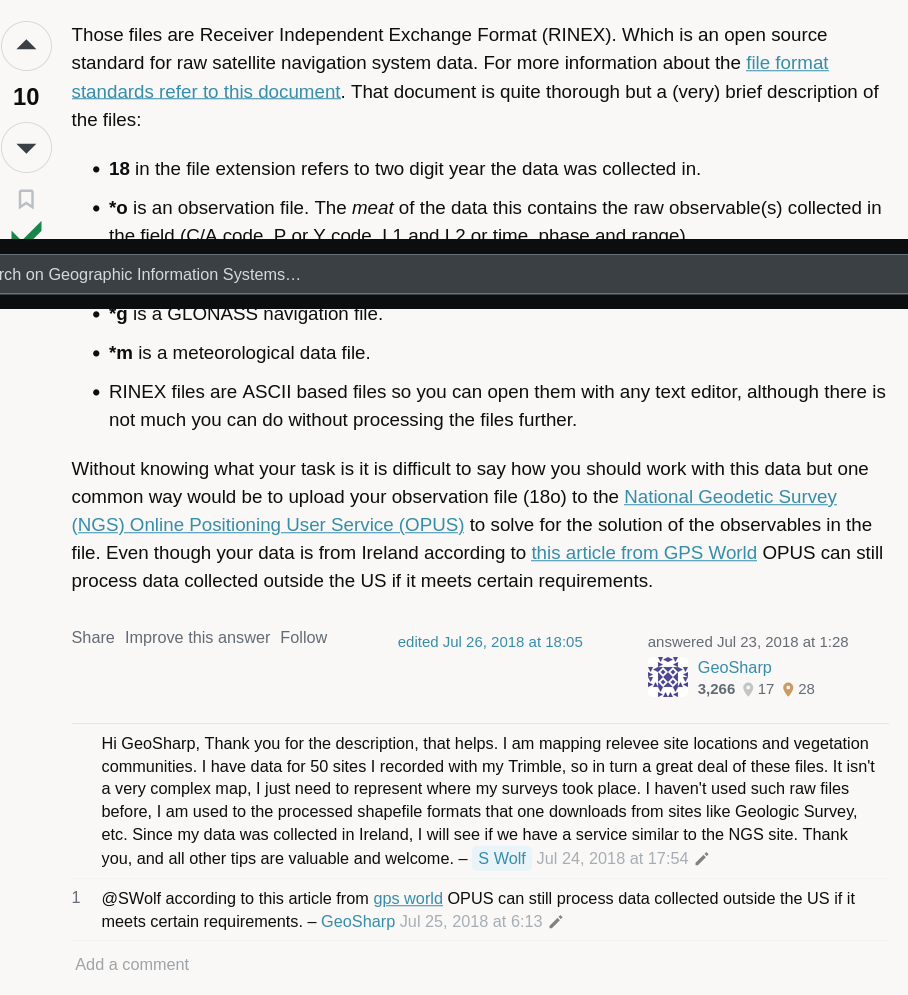

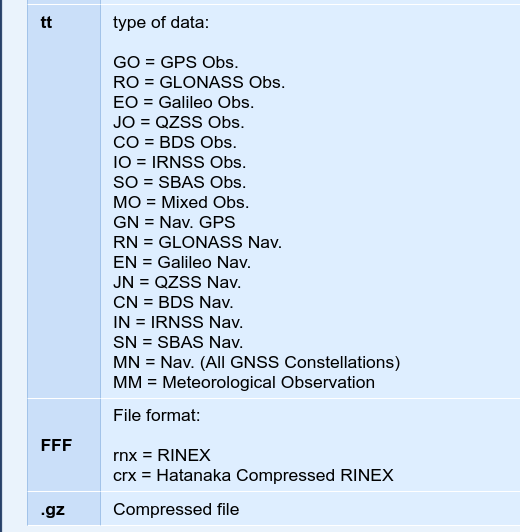

##

In [12]:
cddis_daily_obs(download_folder, cddis, 'hyde', 2021, 125)

FTP Dir: /pub/gps/data/daily/2021/125/21o, Local Dir: /media/abhishek/DATA/open_source/bernese_automation


In [6]:
cddis_hatanaka_obs(download_folder, cddis, 'lck4', 2023, 200)

FTP Dir: /pub/gps/data/daily/2023/200/23d, Local Dir: /media/abhishek/DATA/open_source/bernese_automation


In [10]:
cddis_gps_nav(download_folder, cddis, 'iisc', 2023, 200)

FTP Dir: /pub/gps/data/daily/2023/200/23n, Local Dir: /media/abhishek/DATA/open_source/bernese_automation
